We are going to create a categorical response based on the number of cylinders a car has. For example, cars with cylinders of 3,4 we consider to be 0(small class car) and 5,6,8 to be 1(big class car)

In [2]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
#getting data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
col_names = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin","car_name"]
data = pd.read_csv(url,names=col_names,delim_whitespace=True)

In [4]:
data.sort('cylinders',inplace=True)
data.head()

/Users/Ken/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
111,18.0,3,70.0,90.00,2124.0,13.5,73,3,maxda rx3
71,19.0,3,70.0,97.00,2330.0,13.5,72,3,mazda rx2 coupe
334,23.7,3,70.0,100.0,2420.0,12.5,80,3,mazda rx-7 gs
243,21.5,3,80.0,110.0,2720.0,13.5,77,3,mazda rx-4
267,27.5,4,134.0,95.00,2560.0,14.2,78,3,toyota corona


In [5]:
#frequency table of car with different cylinders
data.cylinders.value_counts().sort_index()

3      4
4    204
5      3
6     84
8    103
Name: cylinders, dtype: int64

In [6]:
#create a categorical variable: 3,4 as 0; 5,6,8 as 1
data["car_type"]=data.cylinders.map({3:0,4:0,5:1,6:1,8:1})
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,car_type
111,18.0,3,70.0,90.00,2124.0,13.5,73,3,maxda rx3,0
71,19.0,3,70.0,97.00,2330.0,13.5,72,3,mazda rx2 coupe,0
334,23.7,3,70.0,100.0,2420.0,12.5,80,3,mazda rx-7 gs,0
243,21.5,3,80.0,110.0,2720.0,13.5,77,3,mazda rx-4,0
267,27.5,4,134.0,95.00,2560.0,14.2,78,3,toyota corona,0


In [15]:
logreg = LogisticRegression(C=1e9)
features_col = ['weight']
X = data[features_col]
y = data.car_type
logreg.fit(X,y)
data['car_type_prediction_prob'] = logreg.predict_proba(X)[:,1]

In [8]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,car_type,car_type_prediction_prob
111,18.0,3,70.0,90.00,2124.0,13.5,73,3,maxda rx3,0,0.015041
71,19.0,3,70.0,97.00,2330.0,13.5,72,3,mazda rx2 coupe,0,0.045313
334,23.7,3,70.0,100.0,2420.0,12.5,80,3,mazda rx-7 gs,0,0.072270
243,21.5,3,80.0,110.0,2720.0,13.5,77,3,mazda rx-4,0,0.288879
267,27.5,4,134.0,95.00,2560.0,14.2,78,3,toyota corona,0,0.144102


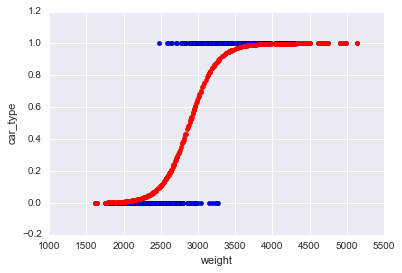

In [30]:
#plotting the prediction
plt.scatter(data.weight,data.car_type)
plt.scatter(data.weight,data.car_type_prediction_prob, color="red")
plt.xlabel("weight")
plt.ylabel("car_type")